In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


In [64]:
df_raw = pd.read_csv('BankChurners.csv')

In [65]:
df_raw.head()
# print(df_raw.columns)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


First I will make y, our target 1 or zero.  To do this i will first make col attrition flag a category type the try to binary it.

In [66]:
dfy = df_raw[['CLIENTNUM','Attrition_Flag']]
df = pd.get_dummies(dfy['Attrition_Flag'])
df = pd.concat((dfy,df),axis=1)
df = df.drop(["Existing Customer"],axis=1)
y = df['Attrited Customer'].to_numpy()
# print(y[0:10])
# df_raw.iloc[130:141]

In [67]:
#===========================================
cols = df_raw.describe().columns
cols = cols.tolist()
dfx = df_raw[cols[1:-2]]
X_num = dfx.to_numpy()
print(str(X_num.shape[1]) + ' Numerical Only')

# categorical, Gender
df_gender = pd.get_dummies(df_raw['Gender'])
genF = df_gender['F'].to_numpy()
Xf = np.append(X_num,genF.reshape((10127,1)),axis=1)
print(str(Xf.shape[1]) + ' with Sex')

# categorical, Education
# 0 = unknown, 1 = undeducated, ... , 6 = Doctorate
# But maybe less educated use credit card more or less than highly educated this is for churn not ability to pay
edu = df_raw['Education_Level'].unique()
df_education = pd.get_dummies(df_raw['Education_Level'])
df_education['Unknown'] = 0*df_education['Unknown']
df_education['High School'] = 2*df_education['High School']
df_education['College'] = 3*df_education['College']
df_education['Graduate'] = 4*df_education['Graduate']
df_education['Post-Graduate'] = 5*df_education['Post-Graduate']
df_education['Doctorate'] = 6*df_education['Doctorate']
df_edu = df_education.sum(axis=1)
edu = df_edu.to_numpy()
Xed = np.append(Xf, edu.reshape((10127,1)),axis=1)
print(str(Xed.shape[1]) + ' with Education')

# categorical, Marriage
# Put 4 columns because is divorced more likely than single to use this card, I dont think so
mar = df_raw['Marital_Status'].unique()
# print(mar)
df_mar = pd.get_dummies(df_raw['Marital_Status'])
df_mar.head()
mar = df_mar.to_numpy()
# print(mar.shape)
Xmar = np.append(Xed,mar,axis=1)
print(str(Xmar.shape[1]) + ' with Marriage, should add 4')

# categorical, Income
# Put 6 columns because i am not sure if this should be ordinal but I am saying not.
inc = df_raw['Income_Category'].unique()
df_inc = pd.get_dummies(df_raw['Income_Category'])
df_inc.head()
inc = df_inc.to_numpy()
Xinc = np.append(Xmar,inc,axis=1)
print(str(Xinc.shape[1]) + ' with Income, should add 6')

# categorical, Card Category
# Put 6 columns because i am not sure if this should be ordinal but I am saying not, dont know what the order is.
cc = df_raw['Card_Category'].unique()
df_cc = pd.get_dummies(df_raw['Card_Category'])
df_cc.tail()
cc = df_cc.to_numpy()
Xcc = np.append(Xinc,cc,axis=1)
print(str(Xcc.shape[1]) + ' with Card Color, should add 4')


# Final X, just rename
X = Xcc
print(X.shape)

# TODO
# Education Level ---- DONE
# Marital Status ----- DONE
# Income Category ---- DONE
# Card Category ------ DONE

14 Numerical Only
15 with Sex
16 with Education
20 with Marriage, should add 4
26 with Income, should add 6
30 with Card Color, should add 4
(10127, 30)


In [80]:
def logreg(X,y,beta=0):
    print('==========================================================================')
    print('Results for simple Logistic Regression with some categorical data.')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    logreg = LogisticRegression(max_iter=3000)
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    labels = ["Existing Customer", 'Attrited Customer']    
    print(classification_report(y_test,y_pred, target_names=labels))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
    print(recall)
    pr_display = PrecisionRecallDisplay(precision, recall).plot()
    print('==========================================================================')
    
#     cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#     print(cnf_matrix)
#     tp = cnf_matrix[0,0]
#     fp = cnf_matrix[1,0]
#     fn = cnf_matrix[0,1]
#     tn = cnf_matrix[1,1]
#     precision = tp/(tp+fp)
#     recall = tp/(tp+fn)
#     print('Precision: ' + str(precision))
#     print('Recall: ' + str(recall))
#     print('F1 Score: ' + str(2*precision*recall/(precision+recall)))
#     print('--------------------------------')
#     print(y_test.shape)
#     print(y_pred.shape)
#     labels = ["Existing Customer", 'Attrited Customer']    
#     print(classification_report(y_test,y_pred, target_names=labels))

Results for simple Logistic Regression with some categorical data.
                   precision    recall  f1-score   support

Existing Customer       0.92      0.96      0.94      2148
Attrited Customer       0.71      0.50      0.59       384

         accuracy                           0.89      2532
        macro avg       0.81      0.73      0.76      2532
     weighted avg       0.88      0.89      0.89      2532

0.7084870848708487
0.5
[1.  0.5 0. ]


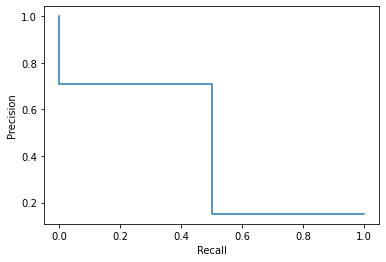

In [81]:
logreg(X,y)

In [ ]:
#Results
# ==========================================================================
# Results for simple Logistic Regression on only numerical columns.
# [[2075   73]
#  [ 200  184]]
# Precision: 0.9120879120879121
# Recall: 0.9660148975791434
# F1 Score: 0.9382771874293466
# ==========================================================================

# with one column male = 1, female = 0, we get this
# ==========================================================================
# Results for simple Logistic Regression with one categorical column for gender.
# [[2071   77]
#  [ 196  188]]
# Precision: 0.913542126157918
# Recall: 0.9641527001862198
# F1 Score: 0.9381653454133636
# ==========================================================================

# with one column male = 0, female = 1, we get this, why are they different and this one is better in some ways
# ==========================================================================
# Results for simple Logistic Regression with one categorical column for gender.
# [[2073   75]
#  [ 192  192]]
# Precision: 0.9152317880794701
# Recall: 0.9650837988826816
# F1 Score: 0.9394969408565601
# ==========================================================================

# with column for male and female, we get this, slightly better
# ==========================================================================
# Results for simple Logistic Regression with two categorical columns for gender.
# [[2072   76]
#  [ 190  194]]
# Precision: 0.9160035366931919
# Recall: 0.9646182495344506
# F1 Score: 0.9396825396825397
# ==========================================================================

# With sex and Education
# ==========================================================================
# Results for simple Logistic Regression with some categorical data.
# [[2070   78]
#  [ 189  195]]
# Precision: 0.9163346613545816
# Recall: 0.9636871508379888
# F1 Score: 0.9394145677331518
# ==========================================================================

# With sex and Education and Marital Status
# ==========================================================================
# Results for simple Logistic Regression with some categorical data.
# [[2072   76]
#  [ 184  200]]
# Precision: 0.9184397163120568
# Recall: 0.9646182495344506
# F1 Score: 0.9409627611262489
# ==========================================================================

# Final Result
# ==========================================================================
# Results for simple Logistic Regression with some categorical data.
# [[2069   79]
#  [ 192  192]]
# Precision: 0.9150818222025653
# Recall: 0.9632216014897579
# F1 Score: 0.9385348151508278
# ==========================================================================

Do I want to optimize for Recall, then use the beta function for F1.  73 False Negatives, is that too many?

In [56]:
#===================================================================   to test what is going on here on simple data
#===================================================================   Sample Logistic Regression
X = np.array([[14, 2], [9, 13], [1, 18], [5, 12], [11, 6], [19, 2],[7,16],[8,15], [10,10],[5,17]])
y = np.array([1,0,0,0,1,1,0,0,1,0])

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [59]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [60]:
cnf_matrix

array([[1, 0],
       [1, 1]], dtype=int64)

In [61]:
cnf_matrix.shape

(2, 2)

In [62]:
y_pred

array([0, 0, 1])

In [63]:
y_test

array([0, 1, 1])

In [43]:
t = np.array([[1,2,3],[4,5,6]])
t2 = np.array([[7,8]])
t2 = np.transpose(t2)
t

array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
new = np.append(t,t2,axis=1)

In [45]:
new

array([[1, 2, 3, 7],
       [4, 5, 6, 8]])